In [1]:
# 데이터분석
import pandas as pd
import numpy as np 

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

import os
import warnings
import random

# ML/DL 모델 및 sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import FinanceDataReader as fdr

# 경고 끄기
warnings.filterwarnings(action='ignore')

# 데이터프레임 제한 풀기
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_seq_items', None)

from datetime import datetime

from pandas_datareader import data as pdr
import yfinance as yf


### 전처리

In [ ]:
# 월 평균값을 내셨다면 안해도 되는 코드들입니다.
# 데이터프레임에 월별주가평균, 코스피월별평균만 있으면 됩니다.
# 월 평균 값만 남기고 나머지 빈칸 있는 행 삭제
# df = pd.read_csv('data/9_emart주가_월평균.csv')
# df = df.dropna()
# df.date = pd.to_datetime(df.date)
# df['date'] = df['date'].dt.strftime('%Y-%m')
# df = df.set_index('date')
# df = df.reset_index('date')
'''
# 월 평균값 있을때
df = pd.read_csv('data/10_emart - 주가,코스피원본.csv')
df.date = pd.to_datetime(df.date)
df['date'] = df['date'].dt.strftime('%Y-%m')
df = df.set_index('date')

# MinMaxScaler로 price, kospi 데이터 정규화
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=['pricemm','kospimm'])
df = df.reset_index('date')
df_scaled.insert(0,'date', df['date'] )

df = df.merge(df_scaled,how='left')
df.head()
'''

In [2]:
# 월별 날짜로 만들기

def to_month(data):
    data['date'] = data['Date']
    
    for i in range(len(data)):
        year = str(data.Date[i].year)
        month = str(data.Date[i].month)
        date = year + '-' + month
        data['date'][i] = datetime.strptime(str(date), '%Y-%m').date()
        
    data = data.drop(columns=['Date','Open','High','Low','Volume','Change'])
    
    # df column 위치 조절
    data = data[['date','Close']]
    data = data.groupby('date').mean()
    
    data = data.reset_index()
    
    # month column으로 만들기
    for j in range(len(data)):
        data.date = data.date.astype(str)
        data.date[j] = data.date[j][:7]

    return data

In [3]:
# 월별 날짜로 만들기

def to_month_kospi(data):
    data['date'] = data['Date']
    
    for i in range(len(data)):
#         data['Date'][i] = datetime.strptime(str(kospi.Date[i]), '%Y-%m-%d')
        year = str(data.Date[i].year)
        month = str(data.Date[i].month)
        date = year + '-' + month
        data['Date'][i] = datetime.strptime(str(date), '%Y-%m').date()
        
    data = data.drop(columns=['Date','High','Low','Volume','Open','Adj Close'])
    
    # df column 위치 조절
    data = data[['date','Close']]
    data = data.groupby('date').mean()
    
    data = data.reset_index()
    
    # month column으로 만들기
    for j in range(len(data)):
        data.date = data.date.astype(str)
        data.date[j] = data.date[j][:7]

    return data

In [10]:
samil = fdr.DataReader(symbol='032280', start='2018-01-01')
samil = samil.reset_index()
samil = to_month(samil)

In [11]:
kospi = pdr.get_data_yahoo("^KS11",'2018-01-01').reset_index()
kospi = to_month_kospi(kospi)

In [12]:
kospi = kospi.groupby('date').mean()

In [13]:
samil = samil.set_index('date')
# kospi = kospi.set_index('date')

In [16]:
df = pd.merge(samil, kospi,on='date',how='outer')
df = df.rename(columns={'Close_x':'samil_close','Close_y':'kospi_close'})
df = df.reset_index()

In [17]:
df

,date,samil_close,kospi_close
0,2018-01,2064.545455,2520.937722
1,2018-02,2176.666667,2439.104451
2,2018-03,2149.047619,2451.570022
3,2018-04,2213.571429,2458.224761
4,2018-05,2504.000000,2461.300500
5,2018-06,2643.947368,2394.507890
6,2018-07,2572.272727,2284.253651
7,2018-08,2416.818182,2283.796820
8,2018-09,2419.117647,2307.325870
9,2018-10,2167.380952,2153.476696


In [18]:
# MinMaxScaler 데이터 정규화

scaler = MinMaxScaler()

df = df.set_index('date')
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

df = df.reset_index()
df_scaled.insert(0,'date', df['date'] )

df = df_scaled

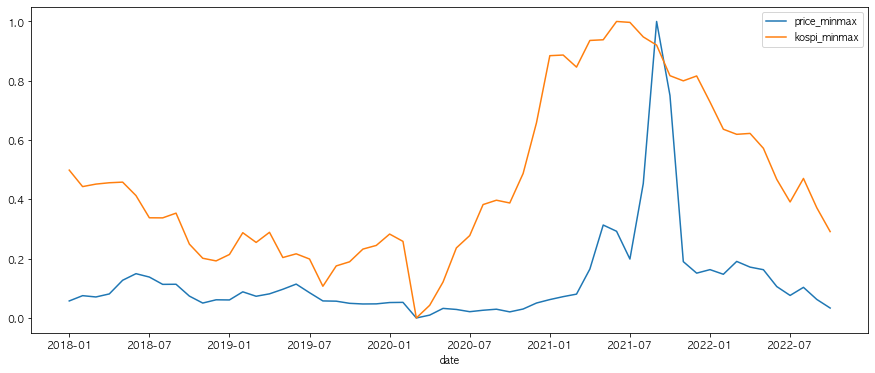

In [19]:
# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.size'] = 23
# plt.rcParams['figure.figsize'] = (13, 8) # figsize 고정
ax=sns.lineplot(data=df, x="date", y="samil_close", label='price_minmax')
ax=sns.lineplot(data=df, x="date", y="kospi_close", label='kospi_minmax')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')
# plt.xticks(rotation=15)

plt.show()

In [ ]:
df = df.reset_index().drop(columns=['index'])#,'level_0'])

In [ ]:
df.info()

In [20]:
for i in range(len(df)-1):
    df.loc[i+1,'samil_slope'] = df.loc[i+1,'samil_close']-df.loc[i,'samil_close']
    df.loc[i+1,'kospi_slope'] = df.loc[i+1,'kospi_close']-df.loc[i,'kospi_close']

df = df.bfill()

for i in range(len(df)):
    df.loc[i,'diff'] = df.loc[i,'kospi_slope'] - df.loc[i,'samil_slope']

    if df.loc[i,'samil_slope'] < df.loc[i,'kospi_slope']:
        df.loc[i, 'label'] = 1
    else:
        df.loc[i, 'label'] = 0

df

,date,samil_close,kospi_close,samil_slope,kospi_slope,diff,label
0,2018-01,0.057452,0.498638,0.017792,-0.055578,-0.073371,0.0
1,2018-02,0.075244,0.443060,0.017792,-0.055578,-0.073371,0.0
2,2018-03,0.070861,0.451526,-0.004383,0.008466,0.012849,1.0
3,2018-04,0.081100,0.456045,0.010239,0.004520,-0.005719,0.0
4,2018-05,0.127188,0.458134,0.046087,0.002089,-0.043998,0.0
5,2018-06,0.149396,0.412771,0.022208,-0.045363,-0.067571,0.0
6,2018-07,0.138022,0.337890,-0.011374,-0.074881,-0.063507,0.0
7,2018-08,0.113353,0.337580,-0.024669,-0.000310,0.024358,1.0
8,2018-09,0.113718,0.353560,0.000365,0.015980,0.015615,1.0
9,2018-10,0.073771,0.249071,-0.039947,-0.104489,-0.064542,0.0


In [ ]:
df.info()

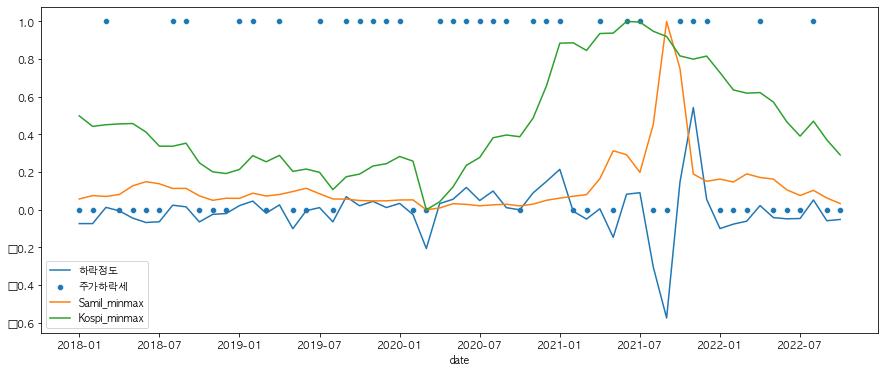

In [21]:
# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.lineplot(data=df, x="date", y="diff", label='하락정도')
ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="samil_close", label='Samil_minmax')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='Kospi_minmax')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')
# plt.xticks(rotation=15)


plt.show()

In [ ]:
# df.to_csv('yvalue_samil.csv',index=False)

- 저장해서 액셀로 켜시고 https://docs.google.com/spreadsheets/d/1fgvvsrypJKAZEljnHw-BNQsWu9WNRNBAtiMUwEad9Sc/edit#gid=1221057598 이 파일을 복사해서 각 시트에 y값('downturn'열)을 만든 데이터로 대체하시면 됩니다.
- downturn이 target(y값) feature입니다. 이것만 date 열 오른쪽에 남기고, 그 오른쪽에 필요한 feature를 추가하면 됩니다.
- 카테고리별로 시트를 나눠놨으니 그 시트에 바로 복붙하세요

#### feature importance로 feature selection

In [ ]:
'''
# 데이터 불러오기 및 날짜 인덱스 지정
df_f = pd.read_csv('data/10_emart - 동행&후행.csv') # 파일 경로를 수정해주세요
df_f.date = pd.to_datetime(df_f.date)
df_f = df_f.set_index('date')
df_f = df_f.drop(['k_s - p_s'], axis=1)

from sklearn.tree import DecisionTreeClassifier

# train, test split (8:2)
X_train, X_test, y_train, y_test = train_test_split(df_f.iloc[:,1:], df_f['downturn'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

# 0,1이 고르게 나누어졌을까?
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델 학습
model = DecisionTreeClassifier(max_depth=3, random_state=1)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
print('정확도 : ', accuracy_score(y_pred, y_test))

# feature importance 확인
ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('경제 동행&후행 Feature Importances') # 그래프 제목을 변경해주세요
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()
'''

- 이런 식으로 상위에 뜬 feature만 selection해서 새로운 데이터 프레임을 만듭니다(액셀 작업 추천)
- accuracy가 0.7 이 넘는 데이터에서 나온 feature를 넣는게 좋았던 것 같습니다.

(44, 11)
(12, 11)
1    0.545455
0    0.454545
Name: label, dtype: float64
0    0.583333
1    0.416667
Name: label, dtype: float64
정확도 :  0.5


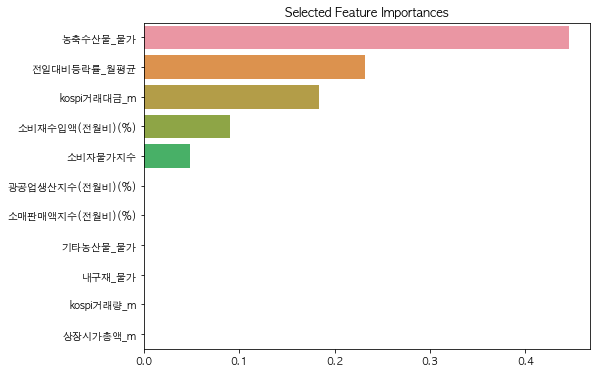

In [22]:

# 데이터 불러오기 및 날짜 인덱스 지정
df_f = pd.read_csv('lhs/data/Samil_feature_ppt.csv') # 파일 경로를 수정해주세요
df_f.date = pd.to_datetime(df_f.date)
df_f = df_f.set_index('date')
df_f = df_f.drop(['diff','동행종합지수(2015=100)', '후행종합지수(2015=100)', 'kospi전일대비월평균'], axis=1)

from sklearn.tree import DecisionTreeClassifier

# train, test split
X_train, X_test, y_train, y_test = train_test_split(df_f.iloc[:,1:], df_f['label'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델
model = DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(X_train, y_train)
# model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print('정확도 : ',accuracy_score(y_pred, y_test))

ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('Selected Feature Importances')
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()


## xgboost

(44, 11)
(12, 11)
1    0.545455
0    0.454545
Name: label, dtype: float64
0    0.583333
1    0.416667
Name: label, dtype: float64
정확도 :  0.4166666666666667


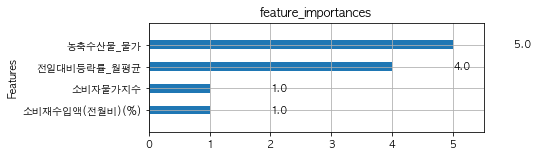

In [46]:
from xgboost import XGBClassifier
import xgboost

# 데이터 불러오기 및 날짜 인덱스 지정
df_f = pd.read_csv('lhs/data/Samil_feature_ppt.csv') # 파일 경로를 수정해주세요
df_f.date = pd.to_datetime(df_f.date)
df_f = df_f.set_index('date')
df_f = df_f.drop(['diff','동행종합지수(2015=100)', '후행종합지수(2015=100)', 'kospi전일대비월평균'], axis=1)

# train, test split (8:2)
X_train, X_test, y_train, y_test = train_test_split(df_f.iloc[:,1:], df_f['label'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

# 0,1이 고르게 나누어졌을까?
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# best_params = {'colsample_bytree': 1.0, 'eta': 0.3, 'gamma': 0.7, 'learning_rate': 0.3, 
#                'max_depth': 4, 'max_leaves': 10, 'min_child_weight': 5, 'n_estimators': 300, 
#                'random_state': 99, 'reg_alpha': 0.1, 'subsample': 0.7, 'tree_method': 'hist'}
# model
# model = DecisionTreeClassifier(max_depth=3, random_state=1) # 0.75
# model = XGBClassifier(tree_method= 'hist') # acc = 0.6667
# model = XGBClassifier(n_estimators=3000,random_state = 42) # acc = 0.6667
model = XGBClassifier(gamma=3, learning_rate=0.3,random_state=99) # acc = 0.9167
# model = XGBClassifier(prams=best_params)
# model = XGBClassifier(gamma=3, learning_rate=0.3, random_state = 99, tree_method= 'hist') # acc = 0.5
# 가끔 도움 되는 파라미터
# model = XGBClassifier(colsample_bytree=1.0, eta=0.3, gamma=3, learning_rate=0.3, max_depth=3, max_leaves=10, min_child_weight= 1, n_estimators= 400, random_state = 99, reg_alpha= 0.01, subsample= 0.7, tree_method= 'hist')
# subsample= 0.7, tree_method= 'hist' 이거 2개 파라미터 도움 안됨
# model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_valid, y_valid)])
model.fit(X_train, y_train)

# prediction
# xgb_roc_score = roc_auc_score(y_valid, model.predict_proba(X_test)[:,1], average='macro')
# print(xgb_roc_score)

y_pred = model.predict(X_test)
print('정확도 : ',accuracy_score(y_pred, y_test))

fig, ax = plt.subplots(1,1,figsize=(6,2))
plt.rcParams['font.family'] = 'AppleGothic'
xgboost.plot_importance(model, title='feature_importances', xlabel='', ax=ax, max_num_features=20, height=0.4)
# xgboost.plot_importance(xgb, title='feature_importances', xlabel='', grid=False, ax=ax)
plt.show()

#### 하락 팩터 찾기

In [47]:
## feature selection된 데이터 MinMaxScaling

df_f = df_f.drop(columns=['label'])

# MinMaxScaler로 price, kospi 데이터 정규화
scaler = MinMaxScaler()
scaler.fit(df_f)
scaled = scaler.transform(df_f)
df_scaled = pd.DataFrame(scaled, columns=list(df_f.columns))

# 정규화한 데이터에 날짜 열 추가
df_scaled.insert(0,'date', df['date'] )

# 원본데이터에 merge
df = df.merge(df_scaled, how='left')
df = df.fillna(method='ffill')
df

,date,samil_close,kospi_close,samil_slope,kospi_slope,diff,label,광공업생산지수(전월비)(%),소매판매액지수(전월비)(%),소비재수입액(전월비)(%),소비자물가지수,농축수산물_물가,기타농산물_물가,내구재_물가,kospi거래대금_m,kospi거래량_m,전일대비등락률_월평균,상장시가총액_m
0,2018-01,0.057452,0.498638,0.017792,-0.055578,-0.073371,0.0,0.442623,0.633803,0.701299,0.000000,0.071221,0.350901,0.222330,0.123386,0.067183,0.648414,0.403059
1,2018-02,0.075244,0.443060,0.017792,-0.055578,-0.073371,0.0,0.524590,0.507042,0.740260,0.070434,0.246880,0.460620,0.174515,0.111787,0.088356,0.281133,0.374018
2,2018-03,0.070861,0.451526,-0.004383,0.008466,0.012849,1.0,0.540984,0.676056,0.519481,0.060655,0.134864,0.361709,0.349029,0.111648,0.074071,0.541049,0.393925
3,2018-04,0.081100,0.456045,0.010239,0.004520,-0.005719,0.0,0.590164,0.563380,0.428571,0.077581,0.149417,0.265186,0.396845,0.153737,0.155170,0.614105,0.403073
4,2018-05,0.127188,0.458134,0.046087,0.002089,-0.043998,0.0,0.573770,0.464789,0.337662,0.082095,0.086416,0.329200,0.513835,0.209395,0.257661,0.401447,0.407634
5,2018-06,0.149396,0.412771,0.022208,-0.045363,-0.067571,0.0,0.672131,0.422535,0.662338,0.063288,0.000000,0.260452,0.375243,0.141685,0.155370,0.350776,0.366964
6,2018-07,0.138022,0.337890,-0.011374,-0.074881,-0.063507,0.0,0.540984,0.492958,0.545455,0.045514,0.020888,0.192040,0.193447,0.049403,0.042789,0.466480,0.299915
7,2018-08,0.113353,0.337580,-0.024669,-0.000310,0.024358,1.0,0.524590,0.535211,0.350649,0.127516,0.337405,0.324466,0.167233,0.036511,0.000000,0.554513,0.300511
8,2018-09,0.113718,0.353560,0.000365,0.015980,0.015615,1.0,0.360656,0.422535,0.285714,0.198890,0.552615,0.511772,0.188835,0.074731,0.027105,0.551771,0.314404
9,2018-10,0.073771,0.249071,-0.039947,-0.104489,-0.064542,0.0,0.442623,0.464789,0.818182,0.181964,0.376654,0.487055,0.207767,0.076189,0.037770,0.000000,0.220955


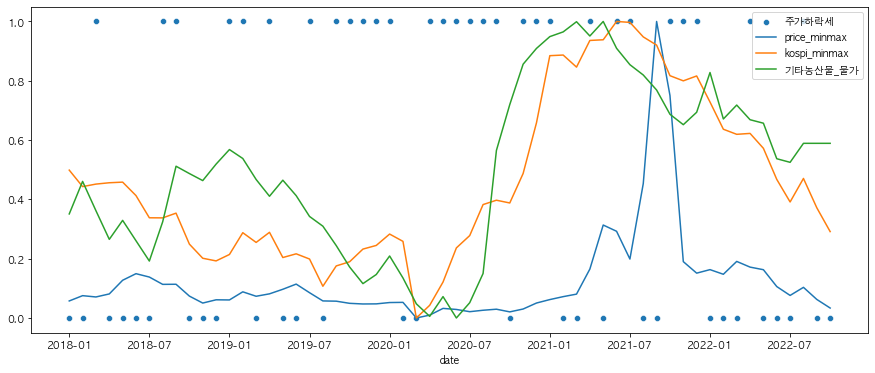

In [52]:
# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="samil_close", label='price_minmax')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi_minmax')
ax = sns.lineplot(data=df, x="date", y="기타농산물_물가", label='기타농산물_물가')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- 기타농산물 물가지수가 하락할 때 주가도 하락세를 탄다.

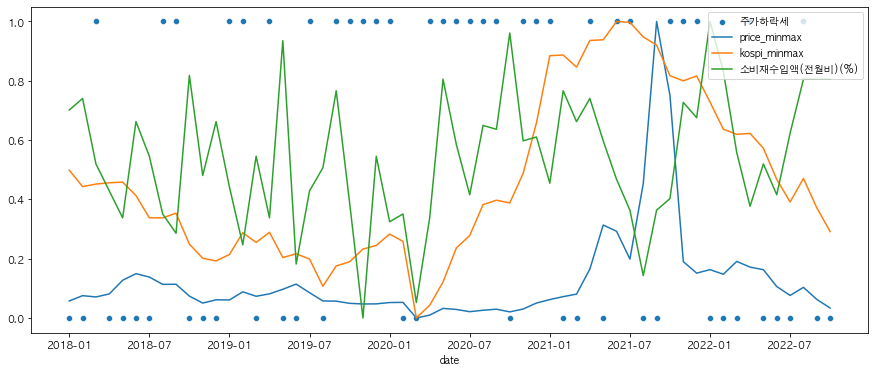

In [57]:
# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="samil_close", label='price_minmax')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi_minmax')
ax = sns.lineplot(data=df, x="date", y="소비재수입액(전월비)(%)", label='소비재수입액(전월비)(%)')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- 소비재 수입액 격월간 차이가 클수록 하락세일 가능성이 높다.

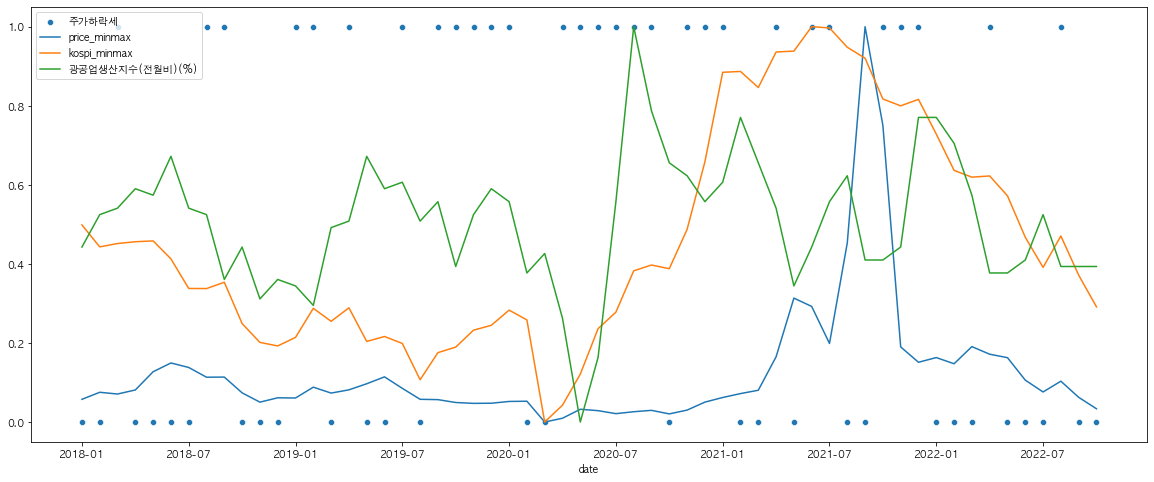

In [56]:
# 주가 데이터 그래프
plt.figure(figsize=(20, 8))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="samil_close", label='price_minmax')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi_minmax')
ax = sns.lineplot(data=df, x="date", y="광공업생산지수(전월비)(%)", label='광공업생산지수(전월비)(%)')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- 광공업 생산지수가 상승하면 주가가 하락세일 가능성이 높다.

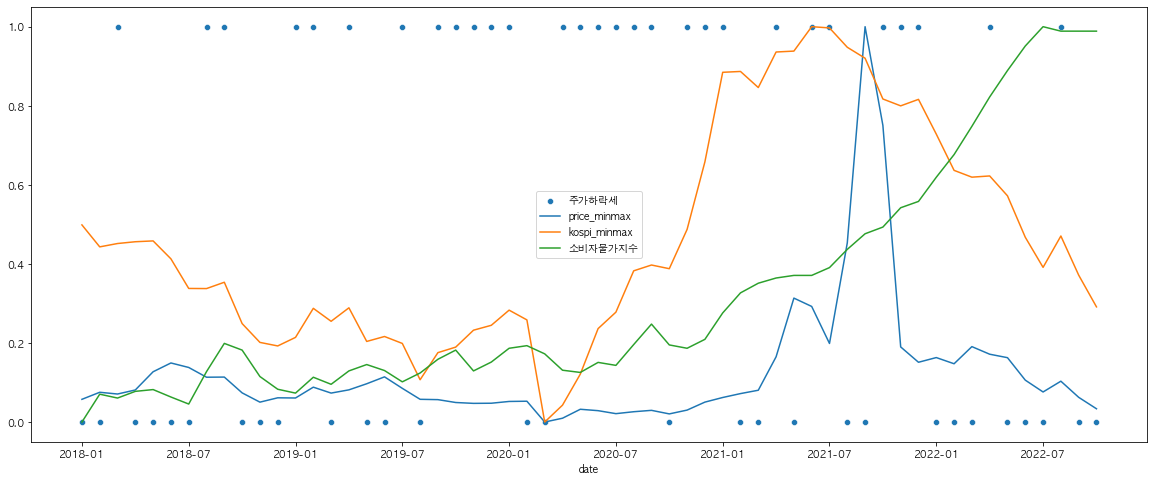

In [55]:
# 주가 데이터 그래프
plt.figure(figsize=(20, 8))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="samil_close", label='price_minmax')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi_minmax')
ax = sns.lineplot(data=df, x="date", y="소비자물가지수", label='소비자물가지수')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- 소비자 물가지수가 일정 지수(약 102) 이하 이면 하락세인 경향을 보인다.

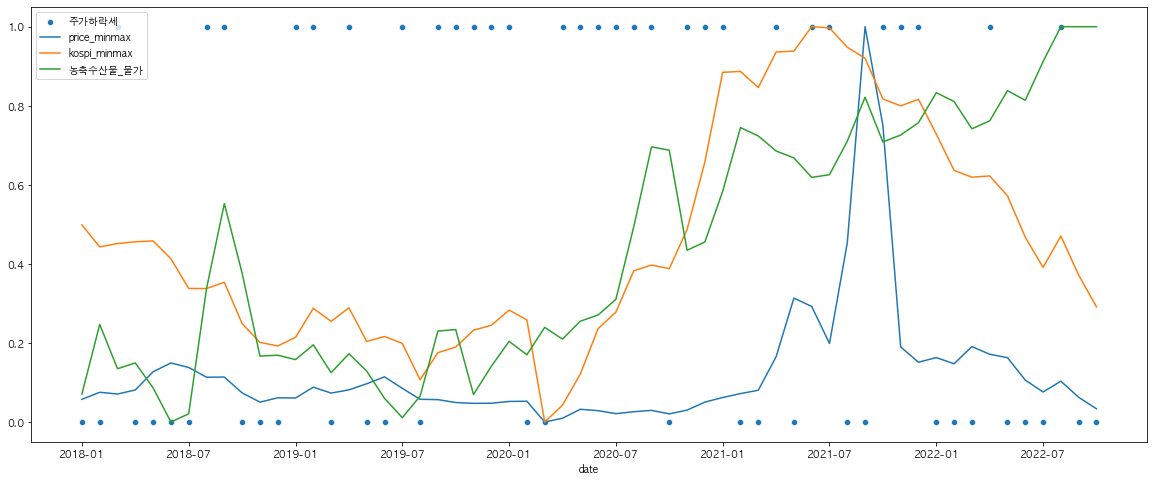

In [54]:
# 주가 데이터 그래프
plt.figure(figsize=(20, 8))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="samil_close", label='price_minmax')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi_minmax')
ax = sns.lineplot(data=df, x="date", y="농축수산물_물가", label='농축수산물_물가')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- 농축수산물 물가 상승시에 하락세인 경향을 보인다. 

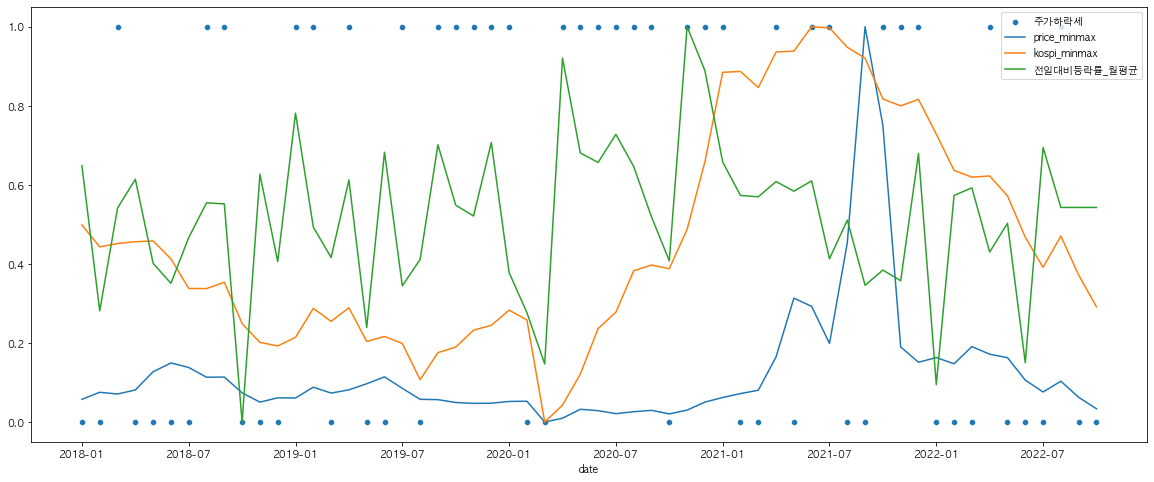

In [53]:
# 주가 데이터 그래프
plt.figure(figsize=(20, 8))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="samil_close", label='price_minmax')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi_minmax')
ax = sns.lineplot(data=df, x="date", y="전일대비등락률_월평균", label='전일대비등락률_월평균')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- kospi의 전일대비등락률의 월평균 값이 월간 0.45이상 차이 난다면 상승세와 하락세의 전환이 일어날 가능성이 높다.